<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_01_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<font size=7 color='#13DAE2'>
Sebastian Carillo Mejía - 1001414595
</font>

------------------------




<font size=6 color='#13DAE2'>
Laboratorio 1.0
</font>

------------------------

Para el dataset realizar lo siguiente:

1. Leer los datos desde la página web

2. Renombrar las columnas en PascalCase
  Ejemplo: La columna radius_worst, concave points_se deberia llamar: RadiusWorst, ConcavePointsSe

3. Emplear los metodos head, tail, describe,info para obtener información acerca del dataframe,

4. Contabilizar la cantidad de null or nan en el dataframe, si hay null, ¿que valor se puede tomar para reemplazar los datos?

5. Encontrar los valores  diferentes en el target, mostrar que es B y M. Emplear el metodo unique.

6. Empleando la libreria seaborn y el metodo countplot, realice un conteo de las personas que tiene la etiqueta B y M.

  ```python
  import seaborn as sns
  sns.countplot?
  ```

7. Agregar una nueva columna llamada DiagnosisNumeric, en la que cada valor B, M se corresponde con un valor 0, 1 respectivamente.

8. Normalizar cada columna respecto a su media y desviación estandar: (x-mean(x))/std(x)

9. Realizar un promedio de todas las características similares, llamelas:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean','SmoothnessMean', 'CompactnessMean', 'ConcavityMean','ConcavePointsMean',"SymetryMean","FractalDimensionMean"]
```

Para encontrar las características similares, radius1, radius2, radius3 y tomar los promedios puede emplear expresiones regulares como:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

con base a lo anterior forme los patrones a buscar, es decir:

```python
[Radius, Texture, Perimeter, ...]
```
 y con base en ello, emplee el metodo `startwith` para un string.  



10. En un mismo gráfico mostrar el histograma de la columna RadiusMean  para la etiqueta B y M en color naranja y azul de la columna Diagnosis respectivamente.

11. Para las columnas:
```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean','SmoothnessMean', 'CompactnessMean', 'ConcavityMean','ConcavePointsMean',"symmetry3","fractal_dimension3"]```

realizar multiples histograma en un gráfico de [violin](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis",var_name="features",value_name="value")
sns.violinplot(x="features",y="value",  hue="Diagnosis",data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```

10. Determinar los datos [outlier](https://en.wikipedia.org/wiki/Outlier)  para la columna RadiusMean y eliminarlos del data frame, para ello construya un gráfico tipo [boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)


```
df.boxplot(column="RadiusMean", by='Diagnosis', sym = 'k.', figsize=(18,6))
```

¿Qué informacion podemos obtener de este tipo de gráficos?


Usar el rango intercuartílico (IQR): El IQR es la diferencia entre el tercer y el primer cuartil de los datos, es decir, el 75% y el 25% de los valores ordenados. Los valores que están fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers y se pueden eliminar o reemplazar. Por ejemplo, si queremos eliminar los outliers de una columna llamada 'edad' usando el IQR, podemos hacer lo siguiente

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra forma de determinar los outlier es con el puntaje Z:
El puntaje Z es el número de desviaciones estándar que un valor está por encima o por debajo de la media. Los valores que tienen un puntaje Z mayor que un umbral (por ejemplo, 3) se consideran outliers y se pueden eliminar o reemplazar. Por ejemplo, si queremos eliminar los outliers de la columna 'edad' usando el puntaje Z, podemos hacer lo siguiente:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```

En un problema de machine learning se debe elegir todas las columnas y construir un algoritmo que permite obtener la mejor calidad de los datos sobre todas las columnas.


11. Encontrar la matrix de correlacion, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

12. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.tail(10)

,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
4990,2023-05-12 14:00:00,1.09051,1.09057,1.08891,1.08919,2245,8,0,1.089850,-0.00134,-0.00057,-0.000955
4991,2023-05-12 15:00:00,1.08917,1.08950,1.08812,1.08866,3440,8,0,1.088915,-0.00053,-0.00134,-0.000935
4992,2023-05-12 16:00:00,1.08866,1.08942,1.08792,1.08811,3902,8,0,1.088385,-0.00055,-0.00051,-0.000530
4993,2023-05-12 17:00:00,1.08811,1.08972,1.08615,1.08622,6036,8,0,1.087165,-0.00189,-0.00055,-0.001220
4994,2023-05-12 18:00:00,1.08623,1.08649,1.08542,1.08552,2978,8,0,1.085875,-0.00070,-0.00188,-0.001290
4995,2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
4996,2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
4997,2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075
4998,2023-05-12 22:00:00,1.08531,1.08549,1.08506,1.08518,1374,8,0,1.085245,-0.00013,-0.00015,-0.000140
4999,2023-05-12 23:00:00,1.08521,1.08522,1.08478,1.08494,706,8,0,1.085075,-0.00024,-0.00010,-0.000170


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                5000 non-null   object 
 1   open                5000 non-null   float64
 2   high                5000 non-null   float64
 3   low                 5000 non-null   float64
 4   close               5000 non-null   float64
 5   tick_volume         5000 non-null   int64  
 6   spread              5000 non-null   int64  
 7   real_volume         5000 non-null   int64  
 8   MeanCloseOpen       5000 non-null   float64
 9   Diff_Close          5000 non-null   float64
 10  Diff_Open           5000 non-null   float64
 11  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(3), object(1)
memory usage: 468.9+ KB


In [20]:
# check if there are null values
df.isna().sum()

time                  0
open                  0
high                  0
low                   0
close                 0
tick_volume           0
spread                0
real_volume           0
MeanCloseOpen         0
Diff_Close            0
Diff_Open             0
Diff_MeanCloseOpen    0
dtype: int64

In [50]:
# Set timestamp index

df.index = pd.to_datetime(df['time'])
df.drop(columns=['time'], inplace=True)
df.head(10)


,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,
2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
2022-07-25 18:00:00,1.02181,1.02229,1.02057,1.02099,4755,8,0,1.021400,-0.00082,-0.00304,-0.001930
2022-07-25 19:00:00,1.02099,1.02248,1.02062,1.02211,2438,8,0,1.021550,0.00112,-0.00082,0.000150
2022-07-25 20:00:00,1.02211,1.02289,1.02136,1.02201,2114,8,0,1.022060,-0.00010,0.00112,0.000510
2022-07-25 21:00:00,1.02201,1.02273,1.02185,1.02211,1589,8,0,1.022060,0.00010,-0.00010,0.000000


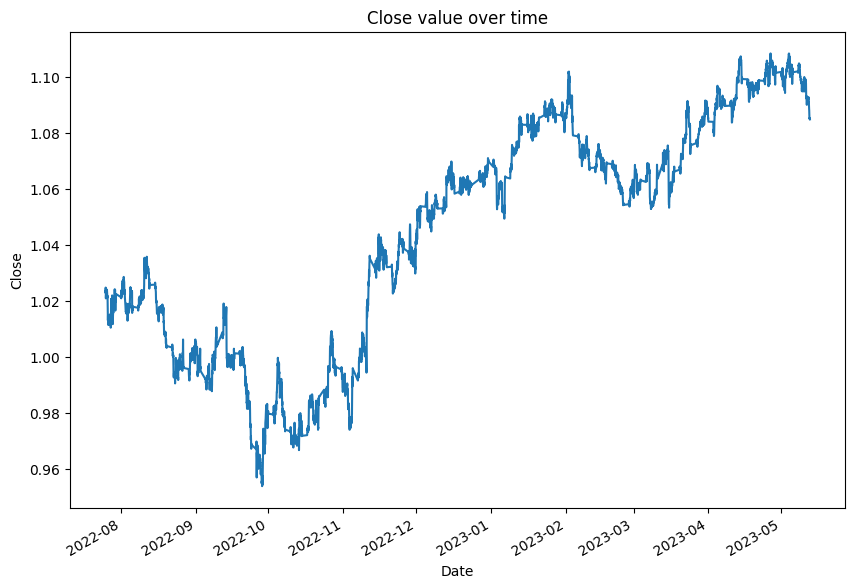

In [51]:
fig = plt.figure(figsize=(10,7))
df['close'].plot()

plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Close value over time')
plt.show()

In [52]:
df.describe()

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.043891,1.044815,1.042991,1.043906,3690.249400,8.981600,0.0,1.043898,0.000012,0.000012,0.000012
std,0.041135,0.040991,0.041263,0.041135,2800.488505,5.785115,0.0,0.041129,0.001400,0.001404,0.000978
min,0.953910,0.955930,0.953570,0.953910,85.000000,0.000000,0.0,0.954735,-0.013970,-0.014010,-0.007260
25%,1.002718,1.003507,1.001715,1.002705,1738.750000,8.000000,0.0,1.002648,-0.000580,-0.000600,-0.000425
50%,1.055670,1.056795,1.054960,1.055700,2999.500000,8.000000,0.0,1.055712,-0.000005,0.000000,0.000005
75%,1.078940,1.079582,1.078222,1.078947,4861.000000,8.000000,0.0,1.078955,0.000620,0.000612,0.000430
max,1.108470,1.109530,1.108050,1.108500,23708.000000,183.000000,0.0,1.108280,0.017340,0.017420,0.010780


### Extraemos las columnas de interés y procedemos a generar una nueva con la diferencia de 'close' entre cada hora

In [53]:
DfDist = df.drop(columns=['open','high','low','tick_volume','spread', 'real_volume','MeanCloseOpen','Diff_Close','Diff_Open','Diff_MeanCloseOpen'])
DfDist['DiffPrice'] = DfDist['close'].diff(1)
DfDist.sample(10)

,close,DiffPrice
time,,
2022-08-23 12:00:00,0.99298,-0.00023
2022-09-16 03:00:00,1.00059,0.00185
2023-02-03 14:00:00,1.09320,0.00029
2023-02-13 03:00:00,1.06670,-0.00056
2023-03-16 05:00:00,1.05988,0.00062
2023-02-22 16:00:00,1.06497,0.00037
2022-12-07 07:00:00,1.04667,0.00029
2023-02-03 13:00:00,1.09291,-0.00061
2023-04-17 05:00:00,1.09807,0.00097


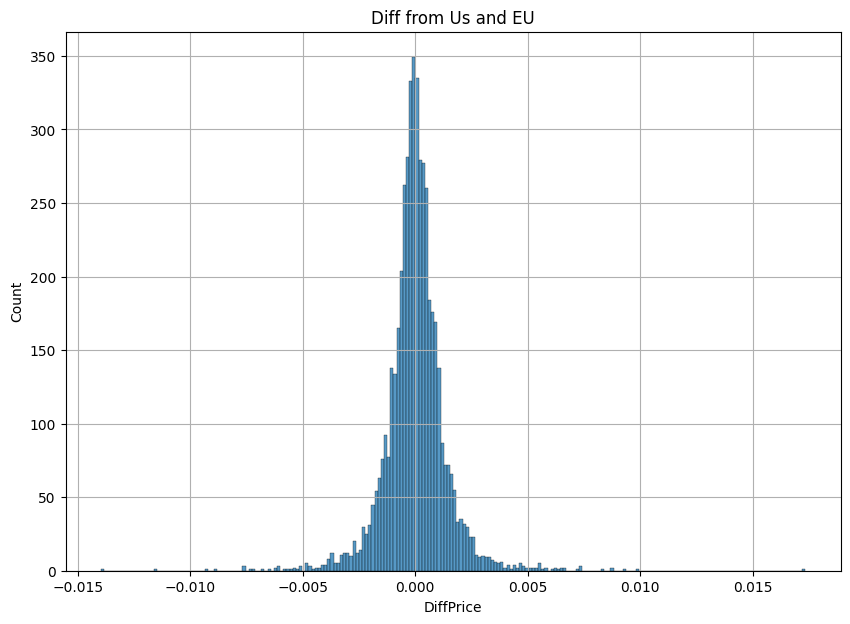

In [54]:
fig = plt.figure(figsize=(10,7))

sns.histplot(data=DfDist,x='DiffPrice')

plt.title('Diff from Us and EU')
plt.grid()
plt.show()

### Usamos fitter para encontar la distribución que siguen los datos

In [26]:
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(DfDist['DiffPrice'].dropna(),
           distributions=get_distributions())
f.fit()
#f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')


2024-09-24 15:22:49.450 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED _fit distribution (taking more than 30 seconds)
/home/sebastian/Desktop/For_studyng/U/8th/Statistics_learning/venv/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/home/sebastian/Desktop/For_studyng/U/8th/Statistics_learning/venv/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval an

{'johnsonsu': {'a': -0.020654532350683215,
  'b': 1.049797421216857,
  'loc': -1.5194909287993722e-05,
  'scale': 0.0008808828671326262}}

### Select only 2023 registers

In [60]:
Data2023 = df[ (df.index >= '2023-01-01') & (df.index <= '2024-01-01')]
Data2023

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,
2023-01-02 00:00:00,1.06998,1.07061,1.06795,1.06796,98,57,0,1.068970,-0.00200,-0.00063,-0.001315
2023-01-02 01:00:00,1.06847,1.06965,1.06847,1.06965,91,183,0,1.069060,0.00169,-0.00151,0.000090
2023-01-02 02:00:00,1.06965,1.07060,1.06904,1.07058,325,11,0,1.070115,0.00093,0.00118,0.001055
2023-01-02 03:00:00,1.07058,1.07075,1.06837,1.06896,271,26,0,1.069770,-0.00162,0.00093,-0.000345
2023-01-02 04:00:00,1.06895,1.06896,1.06799,1.06880,137,78,0,1.068875,-0.00016,-0.00163,-0.000895
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075


## 8

In [61]:
# Mean every 15 days
Data202315DMean = Data2023.groupby(pd.Grouper(freq='15D')).mean()
Data202315DMean.head()

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,
2023-01-02,1.069313,1.070248,1.068430,1.069361,3503.856061,10.181818,0.0,1.069337,0.000047,0.000043,0.000045
2023-01-17,1.085552,1.086401,1.084746,1.085565,3191.670455,8.973485,0.0,1.085558,0.000015,0.000020,0.000017
2023-02-01,1.077734,1.078544,1.076861,1.077679,3179.253788,8.863636,0.0,1.077707,-0.000066,-0.000069,-0.000068
2023-02-16,1.063187,1.063884,1.062480,1.063150,2926.143939,8.833333,0.0,1.063169,-0.000034,-0.000034,-0.000034
2023-03-03,1.063175,1.064041,1.062303,1.063186,3618.418251,8.904943,0.0,1.063181,0.000026,0.000023,0.000024


In [62]:
# Mean every week
Data20231WMean = Data2023.groupby(pd.Grouper(freq='1W')).mean()
Data20231WMean.head()

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,
2023-01-08,1.060026,1.060999,1.059065,1.059972,3606.366667,11.341667,0.0,1.059999,-0.000047,-0.000050,-0.000049
2023-01-15,1.075837,1.076790,1.074993,1.076002,3643.375000,9.141667,0.0,1.075920,0.000156,0.000156,0.000156
2023-01-22,1.082021,1.082941,1.081192,1.082041,3450.716667,9.091667,0.0,1.082031,0.000020,0.000020,0.000020
2023-01-29,1.088411,1.089192,1.087631,1.088414,2863.625000,8.941667,0.0,1.088412,0.000010,0.000007,0.000009
2023-02-05,1.089315,1.090211,1.088410,1.089281,3306.150000,8.900000,0.0,1.089298,-0.000062,-0.000060,-0.000061


In [63]:
# Mean every week
Data2023MMean = Data2023.groupby(pd.Grouper(freq='1M')).mean()
Data2023MMean.head()

/tmp/ipykernel_4732/1329865050.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Data2023MMean = Data2023.groupby(pd.Grouper(freq='1M')).mean()


,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,
2023-01-31,1.077433,1.078325,1.076588,1.077463,3347.763258,9.577652,0.0,1.077448,0.000031,0.000031,0.000031
2023-02-28,1.071221,1.071972,1.070433,1.071167,3029.912500,8.825000,0.0,1.071194,-0.000060,-0.000062,-0.000061
2023-03-31,1.070837,1.071657,1.070032,1.070874,3282.461818,8.901818,0.0,1.070855,0.000049,0.000049,0.000049
2023-04-30,1.096012,1.096711,1.095365,1.096051,2208.629167,8.854167,0.0,1.096032,0.000036,0.000036,0.000036
2023-05-31,1.099051,1.099718,1.098358,1.098980,2240.137500,8.704167,0.0,1.099015,-0.000069,-0.000070,-0.000069


## 9

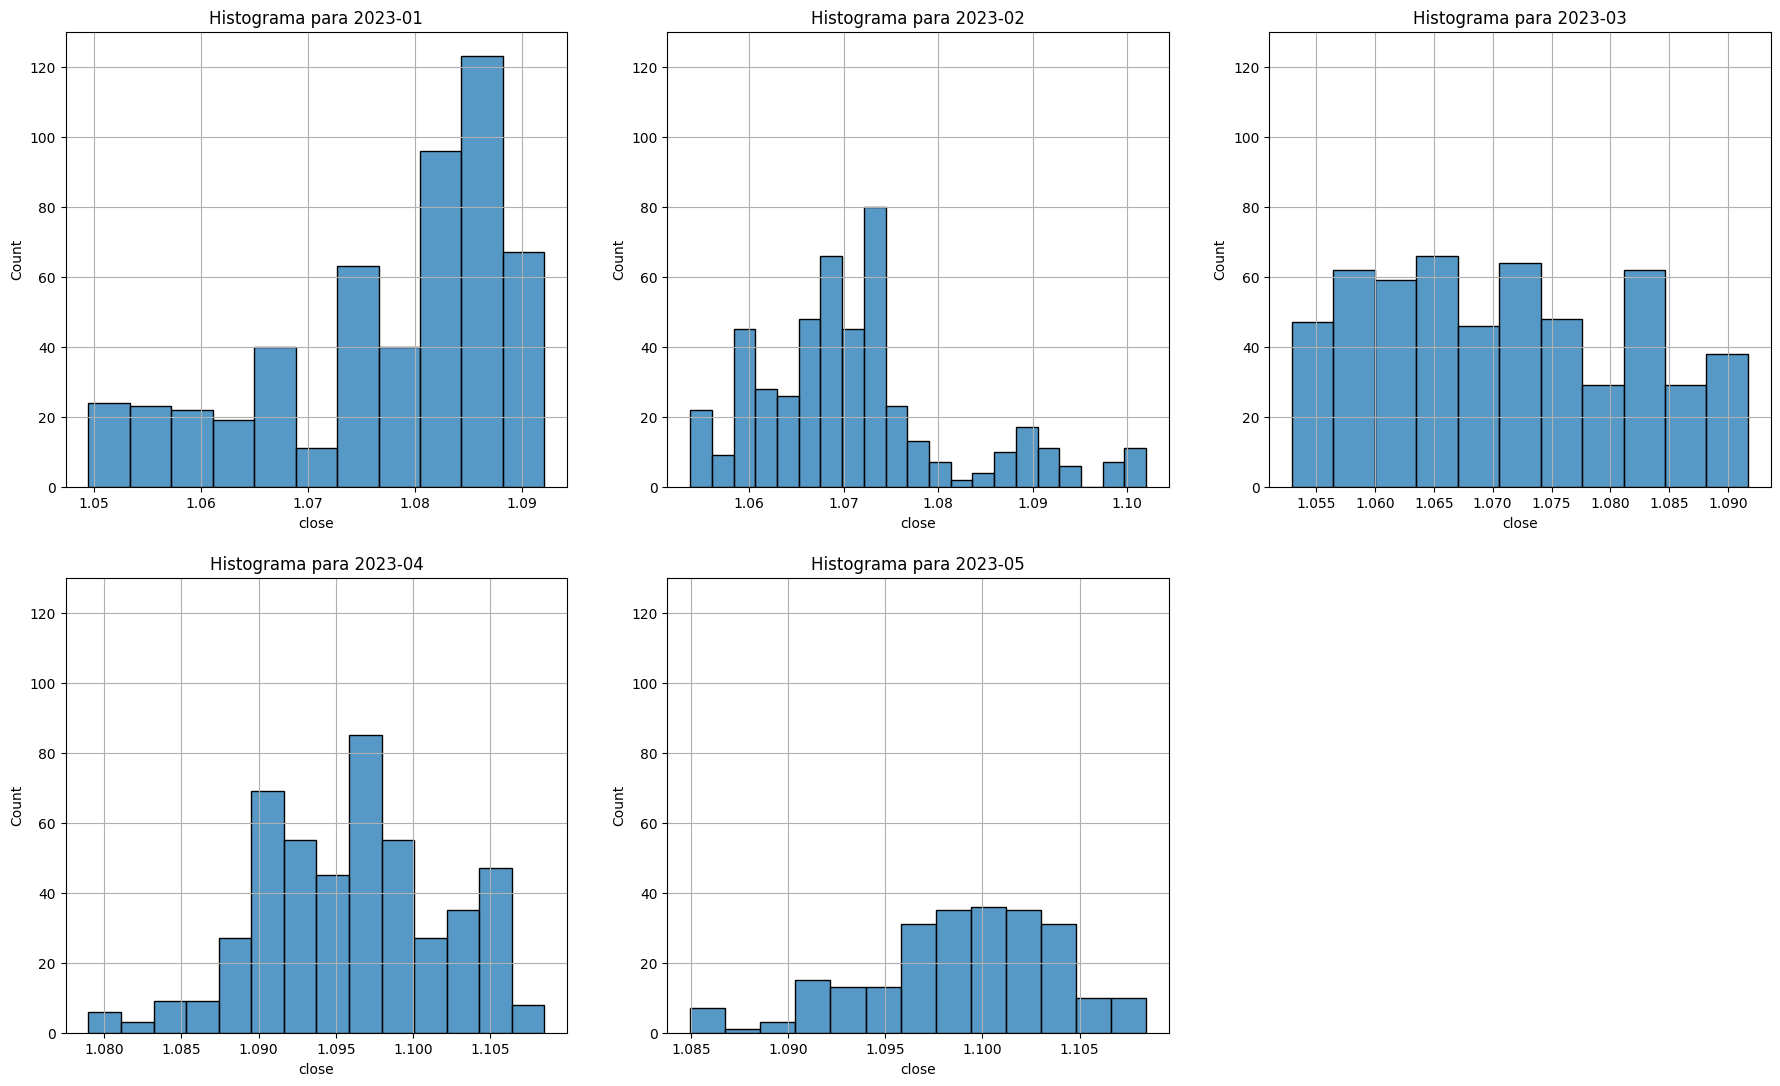

In [78]:
# Group the data
q=Data2023[['close']].groupby(pd.Grouper(freq='ME'))

# Crear la figura y los subplots
#fig, ax = plt.subplots(1, 2, figsize=(17, 10))
#plt.subplots_adjust(hspace=0.35,wspace=0.15)
fig = plt.figure(figsize=(22,13))

counter = 1
for key, group in q:
    plt.subplot(2,3,counter)
    sns.histplot(data=group,x='close')
    plt.title(f'Histograma para {key.strftime("%Y-%m")}')
    plt.ylim(0,130)
    plt.grid(True)
    counter += 1
    

<font size=7 color='#13DAE2'>
Breast Cancer
</font>

------------------------



<font size=6 color='#13DAE2'>
1. Load the data
</font>

In [188]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
#print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
#print(breast_cancer_wisconsin_diagnostic.variables) 


In [189]:
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

# Add all in a single DataFrame

X['Target'] = y['Diagnosis']
X.head()

/tmp/ipykernel_4732/3668337452.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Target'] = y['Diagnosis']


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [190]:
y.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [191]:
X.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Target'],
      dtype='object')


<font size=6 color='#13DAE2'>
2. Move To Pascal Notation
</font>

In [192]:
initialNames = X.columns

def PascalCase(element:str):
    splitted = element.split('_')
    
    modificadas = list(map(lambda x:x.capitalize(), splitted))
    result = ''.join(modificadas)
    return result

transformedNames = [PascalCase(x) for x in X.columns]
X.columns = transformedNames
X.head()
#transformedNames

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


<font size=6 color='#13DAE2'>
3. Exploring
</font>

In [193]:
X.head(5)

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [194]:
X.sample(5)

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Target
304,11.46,18.16,73.59,403.1,0.08853,0.07694,0.03344,0.015020,0.1411,0.06243,...,21.61,82.69,489.8,0.11440,0.17890,0.12260,0.05509,0.2208,0.07638,B
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,M
313,11.54,10.72,73.73,409.1,0.08597,0.05969,0.01367,0.008907,0.1833,0.06100,...,12.87,81.23,467.8,0.10920,0.16260,0.08324,0.04715,0.3390,0.07434,B
139,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.047960,0.1771,0.06072,...,15.77,76.53,434.0,0.13670,0.18220,0.08669,0.08611,0.2102,0.06784,B
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,B


In [195]:
X.tail(5)

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,B


In [196]:
# Verify data integrity
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Radius1            569 non-null    float64
 1   Texture1           569 non-null    float64
 2   Perimeter1         569 non-null    float64
 3   Area1              569 non-null    float64
 4   Smoothness1        569 non-null    float64
 5   Compactness1       569 non-null    float64
 6   Concavity1         569 non-null    float64
 7   ConcavePoints1     569 non-null    float64
 8   Symmetry1          569 non-null    float64
 9   FractalDimension1  569 non-null    float64
 10  Radius2            569 non-null    float64
 11  Texture2           569 non-null    float64
 12  Perimeter2         569 non-null    float64
 13  Area2              569 non-null    float64
 14  Smoothness2        569 non-null    float64
 15  Compactness2       569 non-null    float64
 16  Concavity2         569 non

In [197]:
X.describe()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<font size=6 color='#13DAE2'>
4. Null Values
</font>

In [198]:
X.isna().sum()

Radius1              0
Texture1             0
Perimeter1           0
Area1                0
Smoothness1          0
Compactness1         0
Concavity1           0
ConcavePoints1       0
Symmetry1            0
FractalDimension1    0
Radius2              0
Texture2             0
Perimeter2           0
Area2                0
Smoothness2          0
Compactness2         0
Concavity2           0
ConcavePoints2       0
Symmetry2            0
FractalDimension2    0
Radius3              0
Texture3             0
Perimeter3           0
Area3                0
Smoothness3          0
Compactness3         0
Concavity3           0
ConcavePoints3       0
Symmetry3            0
FractalDimension3    0
Target               0
dtype: int64

<font size=6 color='#13DAE2'>
5. Unique Values
</font>

In [199]:
y['Diagnosis'].unique()

array(['M', 'B'], dtype=object)

<font size=6 color='#13DAE2'>
6. Count Plot
</font>

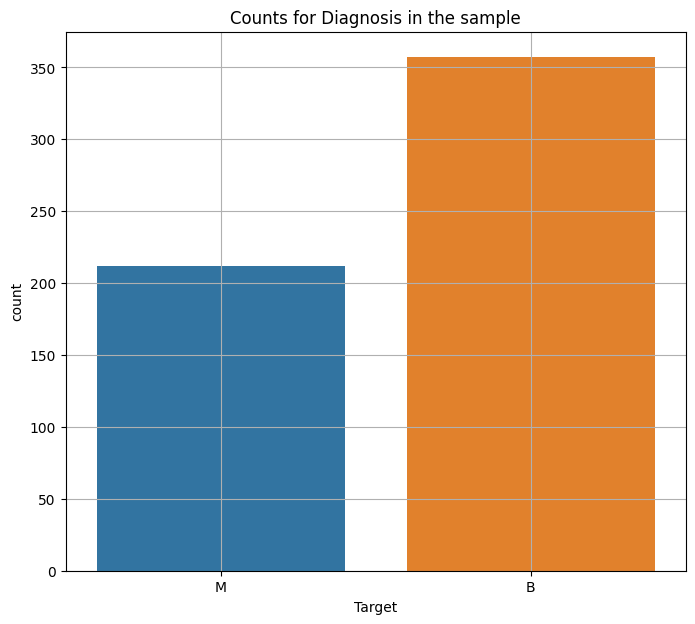

In [204]:
fig = plt.figure(figsize=(8,7))

sns.countplot(data=X,x='Target', hue='Target')
plt.title('Counts for Diagnosis in the sample')
plt.grid()
plt.show()

<font size=6 color='#13DAE2'>
7. DiagnosisNumeric Column
</font>

In [205]:
X['DiagnosisNumeric'] = X['Target'].map({'M': 1, 'B': 0})
X.sample(10)

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Target,DiagnosisNumeric
335,17.060,21.00,111.80,918.6,0.11190,0.10560,0.15080,0.09934,0.1727,0.06071,...,143.20,1362.0,0.14490,0.2053,0.39200,0.18270,0.2623,0.07599,M,1
163,12.340,22.22,79.85,464.5,0.10120,0.10150,0.05370,0.02822,0.1551,0.06761,...,87.36,553.0,0.14520,0.2338,0.16880,0.08194,0.2268,0.09082,B,0
33,19.270,26.47,127.90,1162.0,0.09401,0.17190,0.16570,0.07593,0.1853,0.06261,...,161.40,1813.0,0.15090,0.6590,0.60910,0.17850,0.3672,0.11230,M,1
272,21.750,20.99,147.30,1491.0,0.09401,0.19610,0.21950,0.10880,0.1721,0.06194,...,195.90,2384.0,0.12720,0.4725,0.58070,0.18410,0.2833,0.08858,M,1
51,13.640,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.01723,0.1353,0.05953,...,96.08,656.7,0.10890,0.1582,0.10500,0.08586,0.2346,0.08025,B,0
206,9.876,17.27,62.92,295.4,0.10890,0.07232,0.01756,0.01952,0.1934,0.06285,...,67.08,331.6,0.14150,0.1247,0.06213,0.05588,0.2989,0.07380,B,0
243,13.750,23.77,88.54,590.0,0.08043,0.06807,0.04697,0.02344,0.1773,0.05429,...,98.00,706.0,0.09368,0.1442,0.13590,0.06106,0.2663,0.06321,B,0
42,19.070,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343,...,177.40,1651.0,0.12470,0.7444,0.72420,0.24930,0.4670,0.10380,M,1
281,11.740,14.02,74.24,427.3,0.07813,0.04340,0.02245,0.02763,0.2101,0.06113,...,84.70,533.7,0.10360,0.0850,0.06735,0.08290,0.3101,0.06688,B,0
213,17.420,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,0.05866,...,120.40,1021.0,0.12430,0.1793,0.28030,0.10990,0.1603,0.06818,M,1


<font size=6 color='#13DAE2'>
8. Normalizing
</font>

In [211]:
# To exclude Numerical Target just exclude here the int64
numeric = X.select_dtypes(include=['float64', 'int64'])

XNormalized = numeric.apply(lambda x: (x - x.mean())/x.std(), axis=0 )
XNormalized.sample(10)

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,DiagnosisNumeric
399,-0.660403,-0.471898,-0.687643,-0.633646,-0.390375,-0.795660,-0.756014,-0.838576,0.129062,-0.369331,...,-0.193162,-0.632726,-0.559549,-0.349003,-0.519047,-0.610133,-0.928709,-0.196801,-0.151474,-0.769931
89,0.145488,-0.941552,0.156425,-0.008494,1.197352,0.559695,0.136236,0.559775,1.110302,0.093818,...,-1.210041,0.063650,-0.135211,-0.204472,0.347249,-0.056506,0.381757,0.404484,0.043418,-0.769931
209,0.324260,-1.483282,0.255195,0.200648,-1.033856,-0.796038,-0.374804,-0.447110,-1.651032,-1.067595,...,-1.587506,0.191616,0.091536,-0.445358,-0.226680,0.115095,-0.168961,-0.938709,-0.509699,-0.769931
516,1.186904,0.300009,1.186509,1.128431,0.742294,0.387388,0.854250,1.174936,0.176482,-0.479807,...,0.085056,1.039766,1.075629,0.737171,-0.004227,0.497121,0.553666,0.280025,-0.294321,1.296535
238,0.026307,1.990300,0.023909,-0.088059,-1.004704,-0.008350,0.269703,-0.124711,-1.713044,-0.213531,...,2.418183,-0.141692,-0.204763,-1.062900,-0.074141,0.163986,-0.493155,-1.633743,-0.331417,-0.769931
87,1.388377,1.232343,1.235894,1.196630,-0.431614,0.307862,0.727557,0.870834,0.515722,-0.921710,...,0.770026,1.358194,1.303957,-0.327105,0.421612,1.453865,1.232175,1.705653,0.494660,1.296535
234,-1.294049,-0.785775,-1.307011,-1.066422,-0.833346,-1.201812,-0.906667,-0.831103,-0.950667,0.174551,...,-1.060356,-1.235657,-0.956664,0.789728,-1.011304,-0.961434,-0.644831,-0.232361,-0.119915,-0.769931
430,0.219267,0.753389,0.416930,0.085563,0.221110,2.237320,2.314364,1.241941,0.836722,0.875648,...,0.307956,0.539804,-0.084100,0.417450,2.890207,3.018400,2.021741,-0.056178,1.747064,1.296535
101,-2.027864,-1.362381,-1.982759,-1.453164,1.467543,-0.542691,-1.113893,-1.260710,0.431824,2.178697,...,-0.998530,-1.691872,-1.221348,1.140107,-0.852091,-1.304683,-1.743529,0.050502,0.546705,-0.769931
105,-0.288671,-0.867151,-0.195853,-0.354317,3.088689,1.366318,1.483956,1.213593,0.413585,2.000236,...,-0.533206,-0.025629,-0.093760,2.357673,0.989185,1.751529,1.277815,0.398019,3.131241,1.296535


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Radius1            569 non-null    float64
 1   Texture1           569 non-null    float64
 2   Perimeter1         569 non-null    float64
 3   Area1              569 non-null    float64
 4   Smoothness1        569 non-null    float64
 5   Compactness1       569 non-null    float64
 6   Concavity1         569 non-null    float64
 7   ConcavePoints1     569 non-null    float64
 8   Symmetry1          569 non-null    float64
 9   FractalDimension1  569 non-null    float64
 10  Radius2            569 non-null    float64
 11  Texture2           569 non-null    float64
 12  Perimeter2         569 non-null    float64
 13  Area2              569 non-null    float64
 14  Smoothness2        569 non-null    float64
 15  Compactness2       569 non-null    float64
 16  Concavity2         569 non